<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [9]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [10]:
# Your code here
from bs4 import BeautifulSoup 
import requests 
import pandas as pd
import matplotlib.pyplot as plt

Download the webpage at the url


In [11]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [12]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
first_execution = True
df = pd.DataFrame(columns=['Language name','Annual average salary'])

for row in soup.find('tbody').find_all('tr'):
    col = row.find_all('td')
    language_name = col[1].text
    annual_salary = col[3].text
    annual_salary = annual_salary.replace('$','').replace(',','')
    
    
    if first_execution:
        first_execution = False
        continue
    
    df = df.append({'Language name':language_name, 'Annual average salary': annual_salary}, ignore_index=True)

C:\Users\42077\AppData\Local\Temp\ipykernel_13268\1034389367.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Language name':language_name, 'Annual average salary': annual_salary}, ignore_index=True)
C:\Users\42077\AppData\Local\Temp\ipykernel_13268\1034389367.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Language name':language_name, 'Annual average salary': annual_salary}, ignore_index=True)
C:\Users\42077\AppData\Local\Temp\ipykernel_13268\1034389367.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Language name':language_name, 'Annual average salary': annual_salary}, ignore_index=True)
C:\Users\42077\AppData\Local\Temp\ipykernel_13268\1034389367.py:16: Fu

Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
df.to_csv('popular-languages.csv', index=False, encoding='utf-8')

In [7]:
df['Annual average salary'] = df['Annual average salary'].astype(int)
df_new = df.sort_values('Annual average salary', ascending = False)

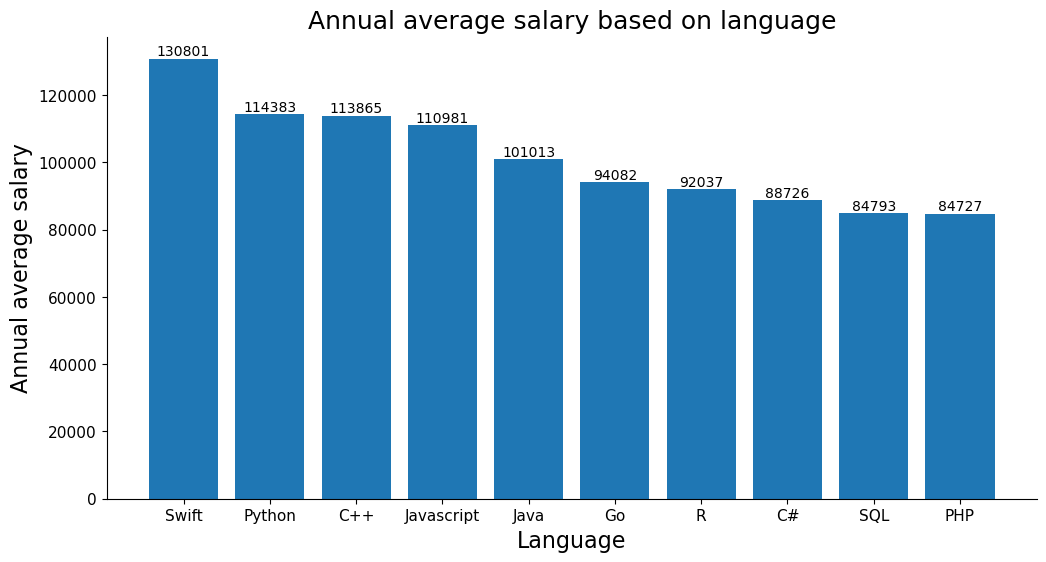

In [8]:
plt.figure(figsize = (12,6))

plt.bar(df_new['Language name'], df_new['Annual average salary'])

plt.xlabel('Language', fontsize=16)
plt.ylabel('Annual average salary', fontsize=16)
plt.title('Annual average salary based on language', fontsize=18)

for index, value in enumerate(df_new['Annual average salary']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
# Customize tick labels font size
plt.xticks(fontsize=11)

# Customize axis label font size
plt.yticks(fontsize=11)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
